# Part 3: FULL BAYESIAN + PREDICTIVE DISTRIBUTION

Write a program in python to implement the full Bayesian inference on Gaussian variables for curve fitting problem. Follow the instructions below:

1. Generate 50 2D-data points using the following function: $y=sin(x^2+1)$. Add Gaussian random noise to the data. Show the original curve line and the noisy data.

In [7]:
import numpy as np  
import matplotlib.pyplot as plt

In [8]:
# Generate Original Curve
def Original_Curve(mu, sigma):
    x_curve = np.linspace(0, 1, 20)
    y_curve = np.sin(np.power(x_curve, 2) + 1)
    x_noise = np.linspace(0, 1, 50)
    y_init_noise = np.sin(np.power(x_noise, 2) + 1)
    noise = np.random.normal(mu, sigma, 50)
    y_noise = y_init_noise + noise
    return x_curve, y_curve, x_noise, y_noise 

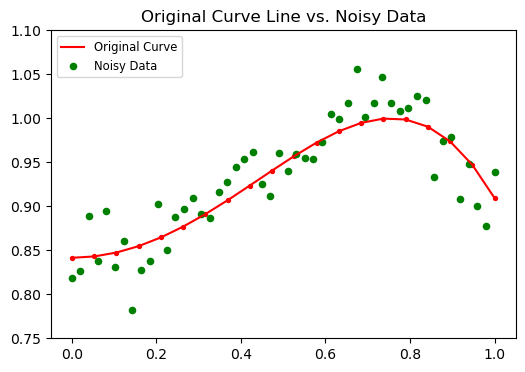

In [9]:
x_curve, y_curve, x_noise, y_noise = Original_Curve(mu=0, sigma=0.03)

# Show the Original Curve Line and the Noisy Data.
plt.figure(figsize=(6, 4))
plt.plot(x_curve, y_curve, label='Original Curve', color='red')
plt.scatter(x_curve, y_curve, color='red', marker='o', s=8)
plt.scatter(x_noise, y_noise, label='Noisy Data', color='green', marker='o', s=20)
plt.title('Original Curve Line vs. Noisy Data')
plt.xlim(-0.05, 1.05)
plt.ylim(0.75, 1.10)
plt.legend(loc='upper left', fontsize='small')
plt.show()

2. Compute $w$ based on the full Bayesian inference (by using basis functions like discussed in class). Display the estimated values of $w$.

For Gaussian basis functions: $\phi_{m}(X_n)=\frac{1}{\sigma\sqrt{2\pi}}exp(-\frac{(X_n-\mu_m)^2}{2S^2})$. Only the exponential part is taken here. 

In [10]:
# Gaussian Basis Functions
def Gaussian_Function(x, mu, s):
    return np.exp(-(np.power(x - mu, 2) / (2 * np.power(s, 2))))

For full bayesian: $\bar{w}=(\alpha\mathbf{I}+\beta\Phi^T\Phi)^{-1}\beta\Phi^T\bar{t}=(\frac{\alpha}{\beta}\mathbf{I}+\Phi^T\Phi)^{-1}\Phi^T\bar{t}$, same as MAP. Set $\frac{\alpha}{\beta}=\lambda$.

In [11]:
# The process of Full Bayesian Inference
def Full_Bayesian(M, Lambda, x, y, s):
    Mu = np.linspace(0, 1, M)  # Depends on M
    I = np.identity(M)
    Phi = np.array([1 if j == 0 else Gaussian_Function(x[i], Mu[j], s) for i in range(50) for j in range(M)]).reshape(50, M)
    t_bar = y
    w_bar = np.squeeze(np.dot(np.linalg.inv(Lambda * I + np.dot(Phi.T, Phi)), np.dot(Phi.T, t_bar)))
    y_bar = np.dot(Phi, w_bar)
    return w_bar, y_bar

In [12]:
def Plot_Curves():
    # Show the Original Curve Line and the Noisy Data.
    plt.plot(x_curve, y_curve, label='Original Curve', color='red')
    plt.scatter(x_curve, y_curve, color='red', marker='o', s=8)
    plt.scatter(x_noise, y_noise, label='Noisy Data', color='green', marker='o', s=20)
    
    # Show the Underfitting Estimated Curve
    plt.plot(x_noise, y_bar, label='Estimated Curve', color='blue')
    plt.title(r'Full Bayesian Inference with M=%s, $\alpha/\beta$=%s, s=%s'%(M, Lambda, s), fontsize=9)
    plt.xlim(-0.05, 1.05)
    plt.ylim(0.75, 1.10)
    plt.legend(loc='upper left', fontsize='small')

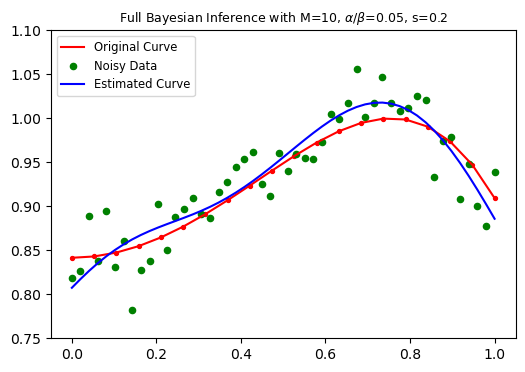

w: [ 0.66233094  0.16274501 -0.02309525  0.03804359  0.08331102  0.0530932
  0.07982468  0.12288174  0.09217961  0.05191773]


In [13]:
# Set M=10, alpha=0.05, beta=1, s=0.2 as an example
M, alpha, beta, s = 10, 0.05, 1, 0.2
Lambda = alpha / beta 
w_bar, y_bar = Full_Bayesian(M, Lambda, x_noise, y_noise, s)

plt.figure(figsize=(6, 4))
Plot_Curves()
plt.show()
print('w:',w_bar)

3. Experiment with your code by changing alpha and beta. Discuss the meaning of them with respect to the curve fitting results.

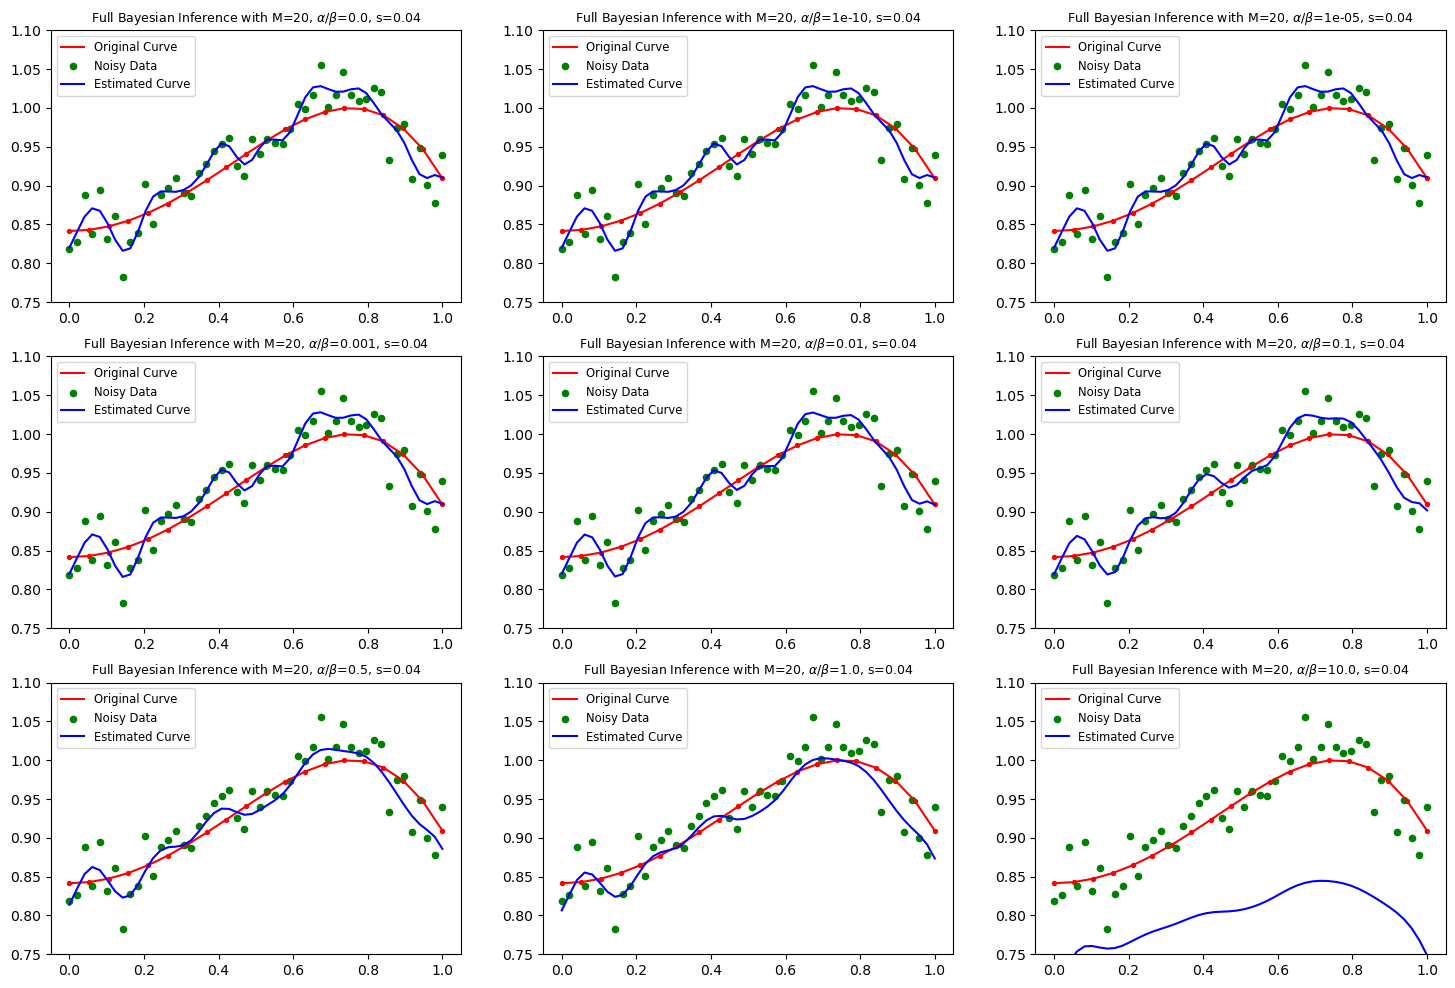

In [14]:
# Changing the value of alpha and beta. Fix M=25, s=0.04 (Creating an overfitting scenario)
M, s = 20, 0.04
Lambdas = np.array([0, 1e-10, 1e-5, 1e-3, 0.01, 0.1, 0.5, 1, 10])

plt.figure(figsize=(18, 12))
for i in range(len(Lambdas)):
    Lambda = Lambdas[i]
    w_bar, y_bar = Full_Bayesian(M, Lambda, x_noise, y_noise, s)
    plt.subplot(3, 3, i+1)
    Plot_Curves()
plt.show()

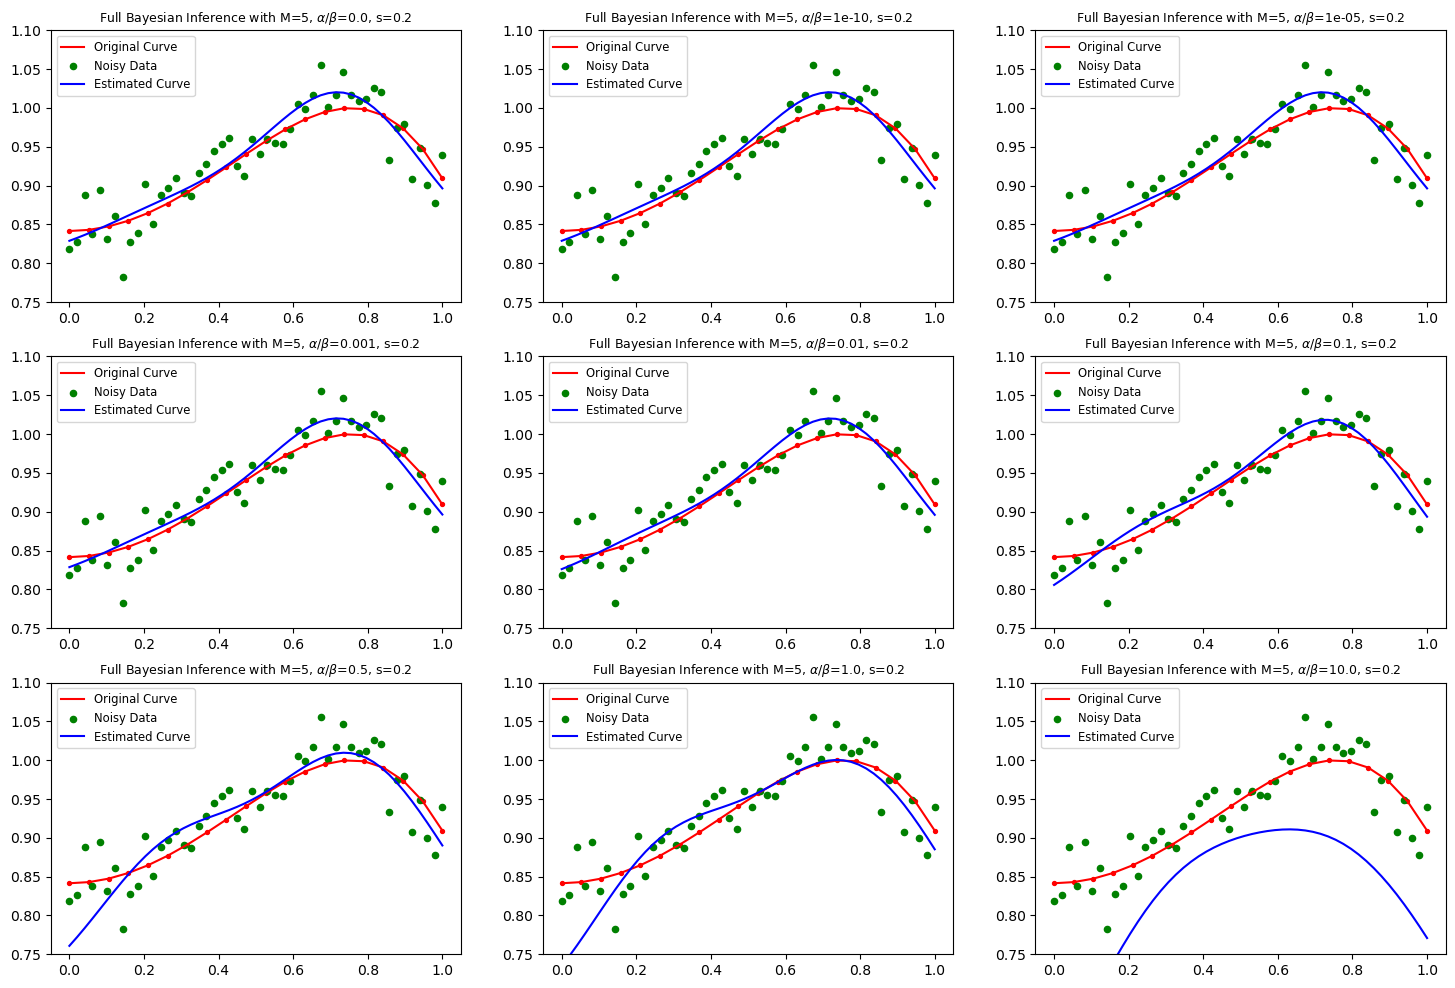

In [15]:
# Changing the value of alpha and beta. Fix M=5, s=0.04
M, s = 5, 0.2
Lambdas = np.array([0, 1e-10, 1e-5, 1e-3, 0.01, 0.1, 0.5, 1, 10])

plt.figure(figsize=(18, 12))
for i in range(len(Lambdas)):
    Lambda = Lambdas[i]
    w_bar, y_bar = Full_Bayesian(M, Lambda, x_noise, y_noise, s)
    plt.subplot(3, 3, i+1)
    Plot_Curves()
plt.show()

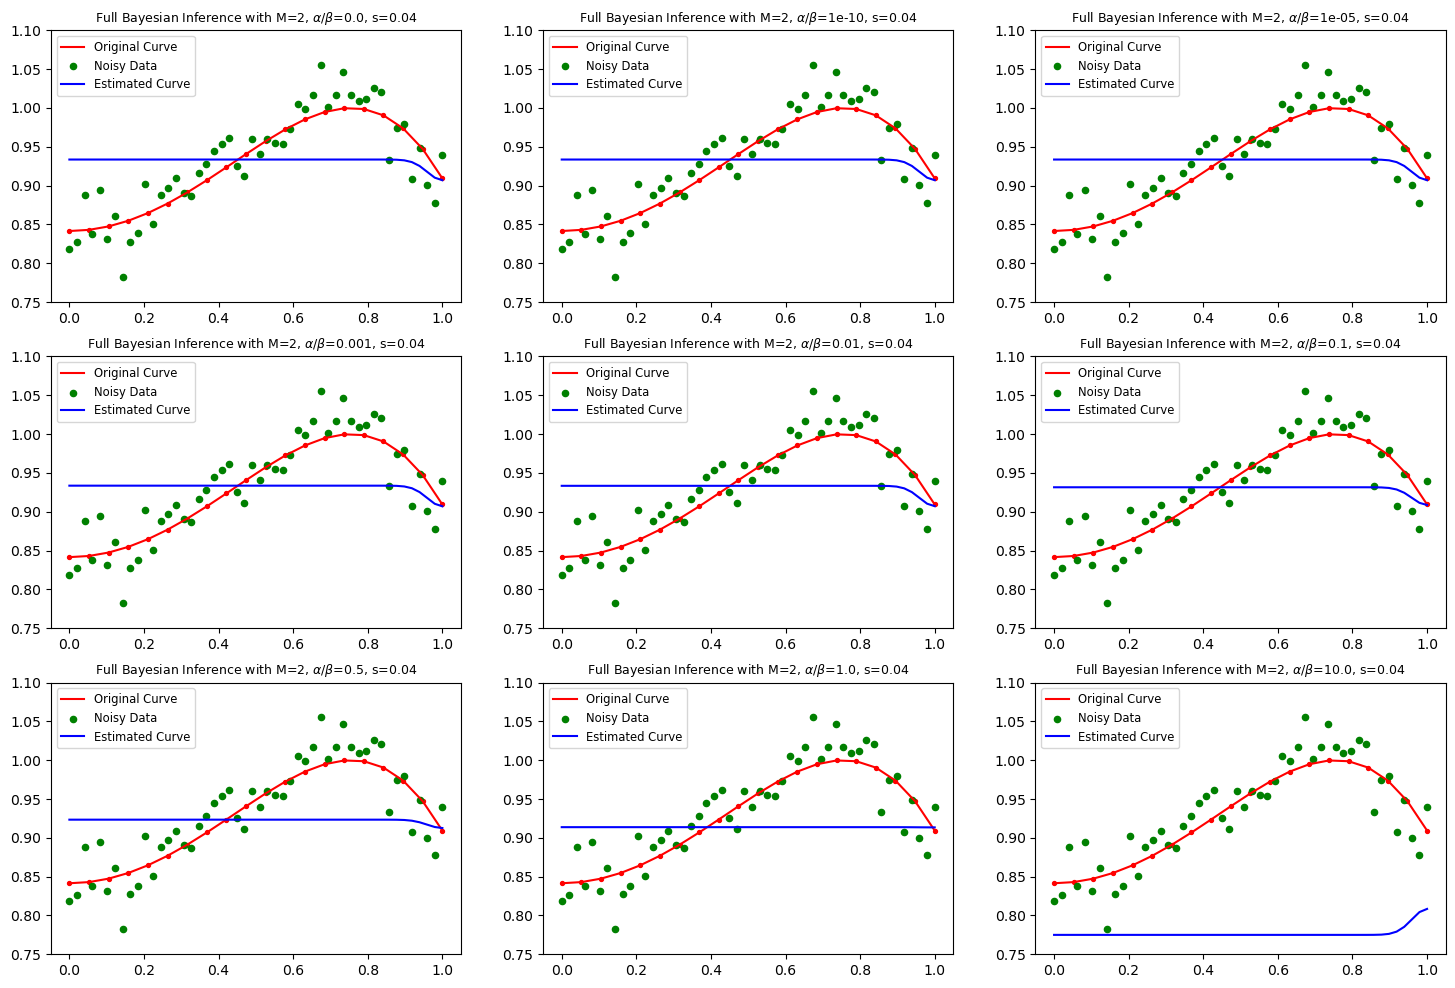

In [16]:
# Changing the value of alpha and beta. Fix M=2, s=0.04 (Creating an underfitting scenario)
M, s = 2, 0.04
Lambdas = np.array([0, 1e-10, 1e-5, 1e-3, 0.01, 0.1, 0.5, 1, 10])

plt.figure(figsize=(18, 12))
for i in range(len(Lambdas)):
    Lambda = Lambdas[i]
    w_bar, y_bar = Full_Bayesian(M, Lambda, x_noise, y_noise, s)
    plt.subplot(3, 3, i+1)
    Plot_Curves()
plt.show()

In the modelling process, the prior probability $p(\bar{w})$ is simplified to an isotropic Gaussian distribution with zero-mean, i.e., $p(\bar{w}|\alpha)=\mathcal{N}(\bar{w}|0,\alpha^{-1}\mathbf{I})$. $\alpha$ is the variance of the prior probability. The likelihood probabilities are then simplified based on the noise conforming to a Gaussian distribution, i.e., $p(t_n|x_n,\bar{w},\sigma^2)=\mathcal{N}(t_n|y_n,\beta^{-1})$, $\beta^{-1}=\sigma^2$ is the variance of Gaussian noise/likelihood probabilities.<br/><br/>
From a mathematical derivation as well as a practical application point of view, the two parameters have their respective roles. the role of $\alpha$ is to limit the size of the parameter $\bar{w}$. By making the parameter $\bar{w}$ smaller, it makes our hypothetical fitting function simpler and reduces the complexity of the model. The role of $\beta$, on the other hand, is to make the training process more focused on fitting the dataset (training set) better. The two balance each other to achieve a relationship of mutual constraints, and eventually find a balance that results in a better fit to the training set and good generalisation. This is the role of regularisation parameters $\alpha/\beta$.<br/><br/>
From this we can see that, to some extent, the regularisation parameter can help us to correct for overfitting due to the increased complexity of the model (larger $M$) (where $\alpha$ comes into play). However, if we set the regularisation parameter too large, during training all parameters converge to 0 and the model becomes a straight line in order to keep the error function as small as possible. Therefore, choosing the values of alpha and beta properly is the key to training.

4. Show your best fitting.

In [17]:
# Root Mean Square Error
def RMSE(y, t):
    return np.sqrt(np.sum(np.power(y - t, 2)) / len(y))

Based on the experience from the above comparison, we set the complexity of the model $M$ to 4 or 5 and the spatial scale $\mathbf{s}$ to 0.2, 0.3 or 0.5. The regularisation parameter $\lambda=\alpha/\beta$ is set to no more than 0.1.

In [18]:
def Best_Fitting():
    M_value = np.array([4, 5])
    s_value = np.array([0.2, 0.3, 0.5])
    L_value = np.array([1e-3, 0.01, 0.1])
    RMS_error = np.zeros(len(M_value)*len(s_value)*len(L_value))
    
    for i in range(len(M_value)):
        M = M_value[i]
        for j in range(len(s_value)):
            s = s_value[j]
            for k in range(len(L_value)):
                Lambda = L_value[k]
                w_bar, y_bar = Full_Bayesian(M, Lambda, x_noise, y_noise, s)
                RMS_error[i*len(L_value)*len(s_value)+j*len(L_value)+k] = RMSE(y_bar, y_noise)
    Best_w = np.argmin(RMS_error)
    Loc = np.array([M_value[Best_w//(len(L_value)*len(s_value))], s_value[(Best_w%(len(L_value)*len(s_value)))//len(L_value)], 
                    L_value[Best_w%len(L_value)], RMS_error[Best_w]])
    
    return Loc

The best fitting curve:


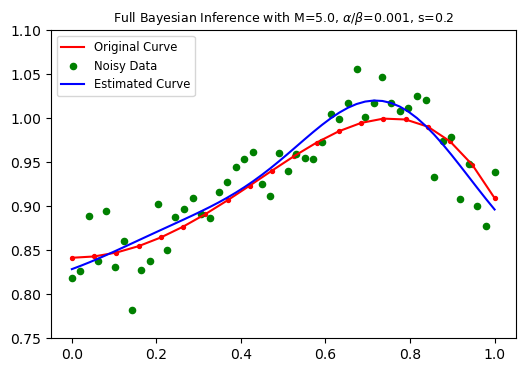

The root square mean error: 0.026309557007687442


In [19]:
[M, s, Lambda, rmse] = Best_Fitting()
w_bar, y_bar = Full_Bayesian(int(M), Lambda, x_noise, y_noise, s)

print('The best fitting curve:')
plt.figure(figsize=(6, 4))
Plot_Curves()
plt.show()
print('The root square mean error:', rmse)

5. Explain how useful $p(w|t)$ for the training and testing stages.

In the training stage, we use either MAP or Full Bayesian Inference in the hope of finding the parameter $\bar{w}$ such that the a posteriori probability $p(\bar{w}|\bar{t})$ is maximised, and in this way we train and predict the curves used for fitting. In the testing stage, the posterior probability $p(w|t)$ is equivalent to quantifying the uncertainty of the predicted $\bar{w}$ for us, and the confidence of the predicted $\bar{w}$ is judged by comparing the scale of $p(w|t)$ to that of the predicted curve.

6. Generate 50 2D-data points using the following function: $y=sin(x^2+1)$. Add Gaussian random noise to the data. Show the original curve line and the noisy data.

Same as Question 1 and therefore not repeated for display.

7. Compute the predictive distribution of every input data sequentially, where each input data is taken randomly from the noise data. Show your best prediction results for all 50 data one by one.

$p(t|\mathbf{x},\mathbf{t},\alpha,\beta)=\mathcal{N}(t|\mathbf{m}_N^T\Phi(\mathbf{x}),\sigma_N^2(\mathbf{x}))$, where $\sigma_N^2(\mathbf{x})=\frac{1}{\beta}+\Phi(\mathbf{x})^T\mathbf{S}_N\Phi(\mathbf{x})$

$\mathbf{S}_n^{-1}=\mathbf{S}_{n-1}^{-1}+\beta\Phi_n^T\Phi_n$, $\mathbf{m}_n=\mathbf{S}_n(\mathbf{S}_{n-1}^{-1}\mathbf{m}_{n-1}+\beta\Phi_n^T\bar{t}_n)$

In [22]:
def Pred_Distribution(M, alpha, beta, x, y, s):
    print('Start Processing:')
    
    I = np.identity(M+1)
    Phi = np.array([1 if j == 0 else Gaussian_Function(x[i], j/(M+1), s) for i in range(50) for j in range(M+1)]).reshape(50, M+1)
    t_bar = y
    
    x_rand = np.random.randint(0, 50, 50)
    print('Samples index:', x_rand)
    x_new = np.array([])
    y_New = np.array([])
    
    S_pre_inv = alpha * I
    M_pre = np.zeros([M+1, 1])
    for i in range(50):
        print('Iter:', i+1)
        print('Input Data:', x_rand[0:i+1])
        index = x_rand[i]
        x_new = np.append(x_new, x[index])
        y_New = np.append(y_New, y[index])
        y_new = y_New.reshape(i+1, 1)
        
        phi = np.array([1 if k == 0 else Gaussian_Function(x_new[j], k/(M+1), s) for j in range(i+1) for k in range(M+1)]).reshape(i+1, M+1)
        
        S_new_inv = S_pre_inv + beta * np.dot(phi.T, phi)
        S_new = np.linalg.pinv(S_new_inv)
        M_new = np.dot(S_new, (np.dot(S_pre_inv, M_pre) + beta * np.dot(phi.T, y_new)))
        S_pre_inv = S_new_inv
        M_pre = M_new
        
        
        t_star = np.dot(M_new.T, Phi.T).T
        t_star = t_star.flatten()
        s_star = np.zeros([50, 1])
        for i in range(50):
            s_star[i][0] = (1 / beta) + np.dot(np.dot(Phi[i], S_new), Phi[i].T)
        s_star = s_star.flatten()
        
        plt.figure(figsize=(6, 4))
        plt.plot(x_curve, y_curve, label='Original Curve', color='red')
        plt.plot(x_noise, t_star, label='Estimated Curve', color='blue')
        plt.scatter(x_curve, y_curve, color='red', marker='o', s=8)
        plt.scatter(x_noise, y_noise, label='Noisy Data', color='green', marker='o', s=16)
        plt.errorbar(x_noise, t_star, yerr=s_star, fmt='b^', ecolor='blue', elinewidth=1, capsize=3)
        plt.title(r'Predictive Distribution with Iter=%s, M=%s, $\alpha$=%s, $\beta$=%s, s=%s'%(i+1, M, alpha, beta, s), fontsize=9)
        plt.legend(loc='upper left', fontsize='small')
        plt.show()
        
    print('End Processing.')

Start Processing:
Samples index: [15 46  8 49 19  5 25 22 34 48 35 17 40 23 23 38  3 32 37 14  7 42 31 38
 21 38 49 24 14 38 41 47 44 43  9 30 31  0  0 48 23 11 48 39 31 23  3 43
 39  7]
Iter: 1
Input Data: [15]


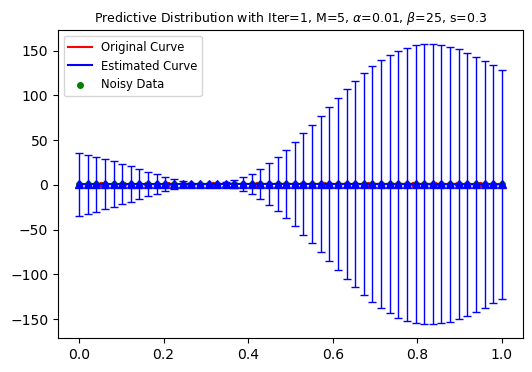

Iter: 2
Input Data: [15 46]


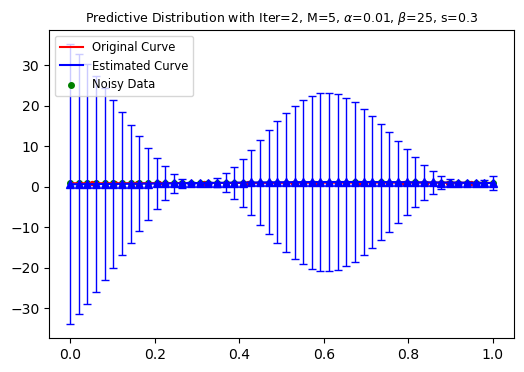

Iter: 3
Input Data: [15 46  8]


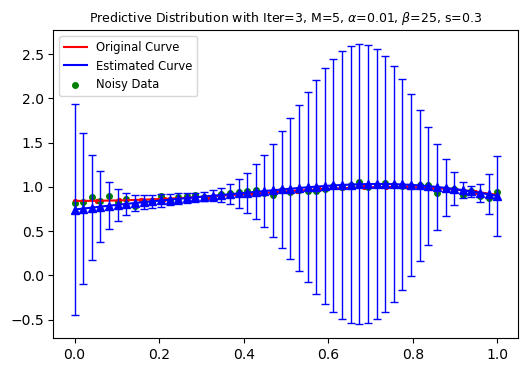

Iter: 4
Input Data: [15 46  8 49]


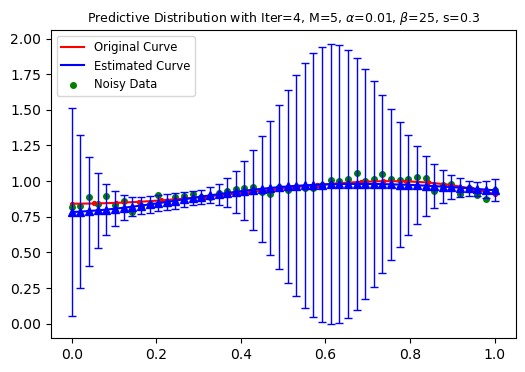

Iter: 5
Input Data: [15 46  8 49 19]


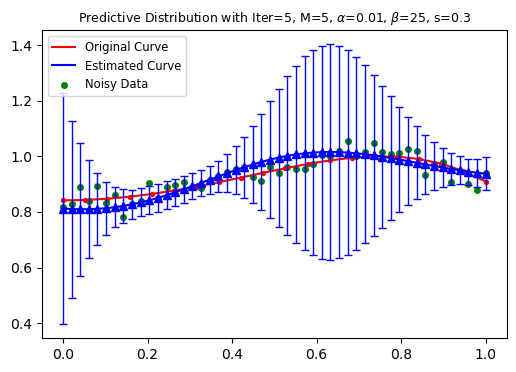

Iter: 6
Input Data: [15 46  8 49 19  5]


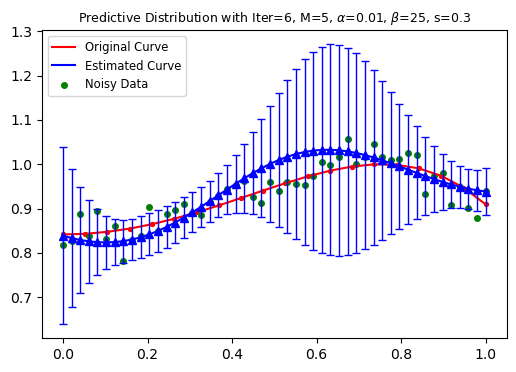

Iter: 7
Input Data: [15 46  8 49 19  5 25]


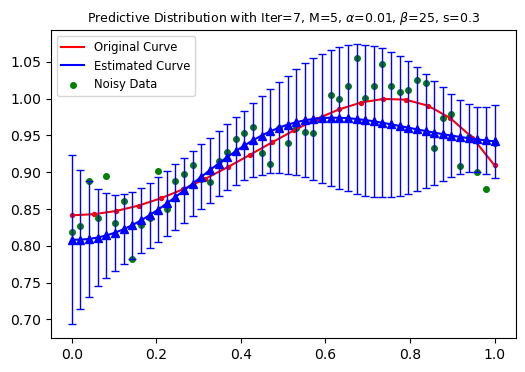

Iter: 8
Input Data: [15 46  8 49 19  5 25 22]


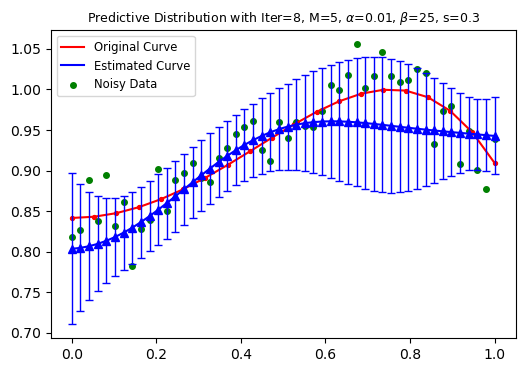

Iter: 9
Input Data: [15 46  8 49 19  5 25 22 34]


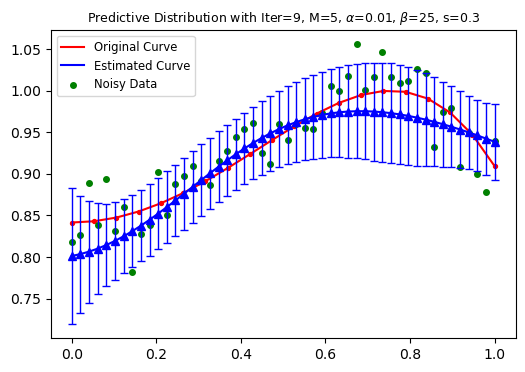

Iter: 10
Input Data: [15 46  8 49 19  5 25 22 34 48]


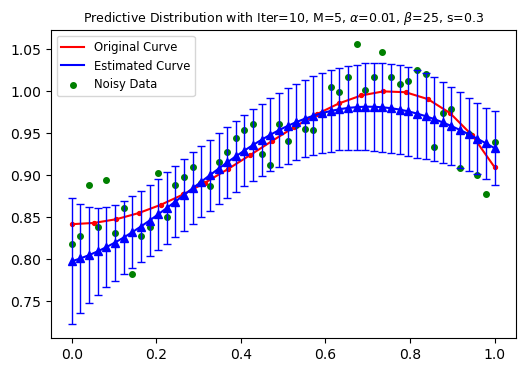

Iter: 11
Input Data: [15 46  8 49 19  5 25 22 34 48 35]


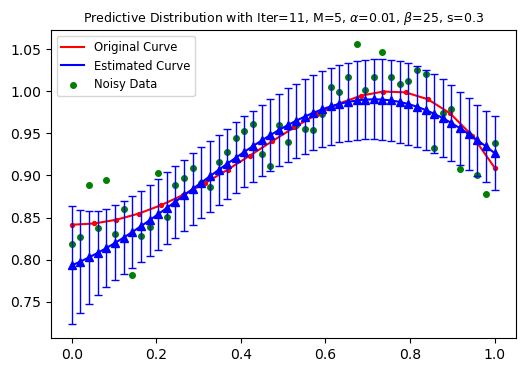

Iter: 12
Input Data: [15 46  8 49 19  5 25 22 34 48 35 17]


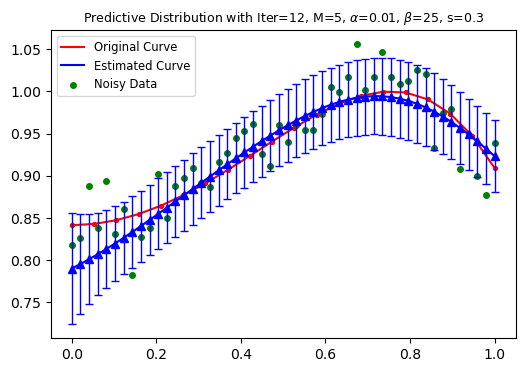

Iter: 13
Input Data: [15 46  8 49 19  5 25 22 34 48 35 17 40]


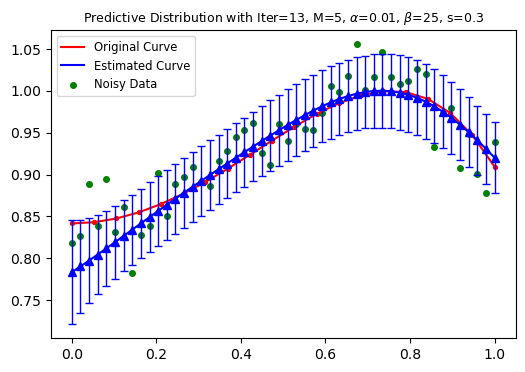

Iter: 14
Input Data: [15 46  8 49 19  5 25 22 34 48 35 17 40 23]


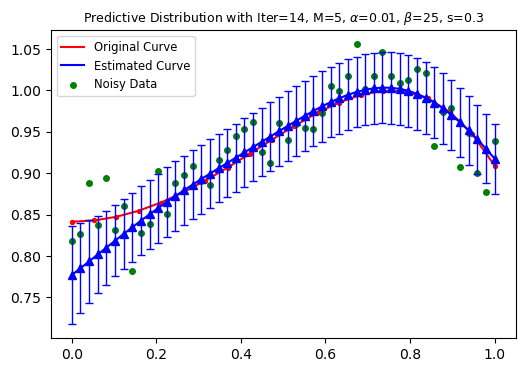

Iter: 15
Input Data: [15 46  8 49 19  5 25 22 34 48 35 17 40 23 23]


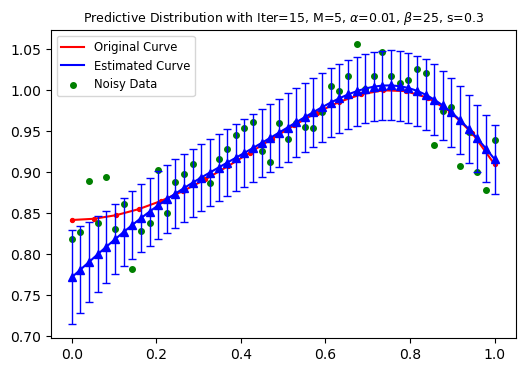

Iter: 16
Input Data: [15 46  8 49 19  5 25 22 34 48 35 17 40 23 23 38]


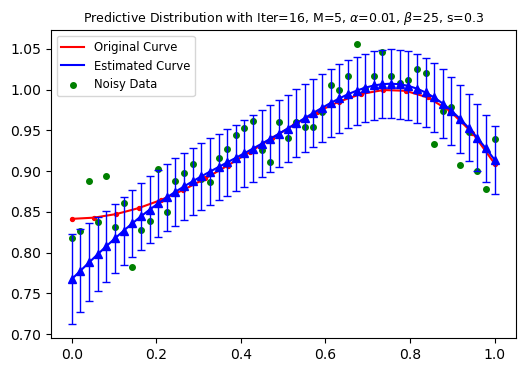

Iter: 17
Input Data: [15 46  8 49 19  5 25 22 34 48 35 17 40 23 23 38  3]


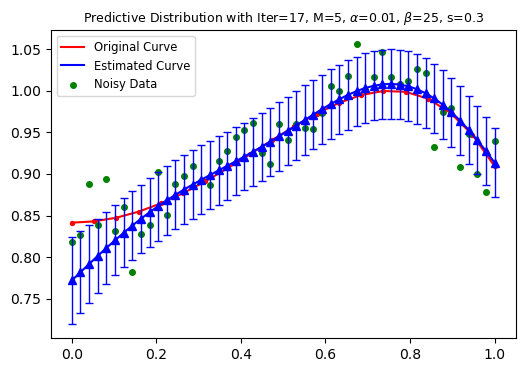

Iter: 18
Input Data: [15 46  8 49 19  5 25 22 34 48 35 17 40 23 23 38  3 32]


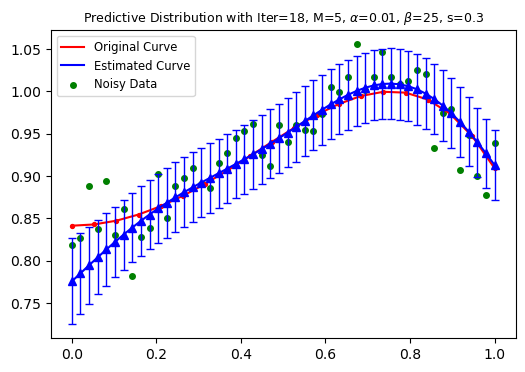

Iter: 19
Input Data: [15 46  8 49 19  5 25 22 34 48 35 17 40 23 23 38  3 32 37]


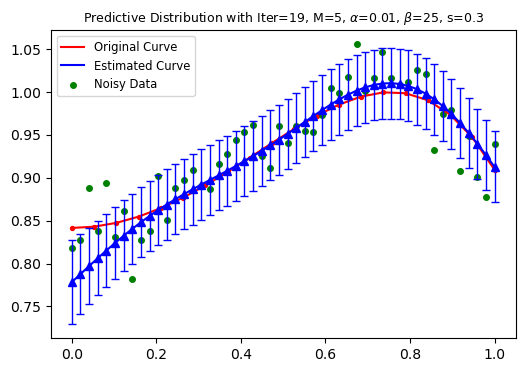

Iter: 20
Input Data: [15 46  8 49 19  5 25 22 34 48 35 17 40 23 23 38  3 32 37 14]


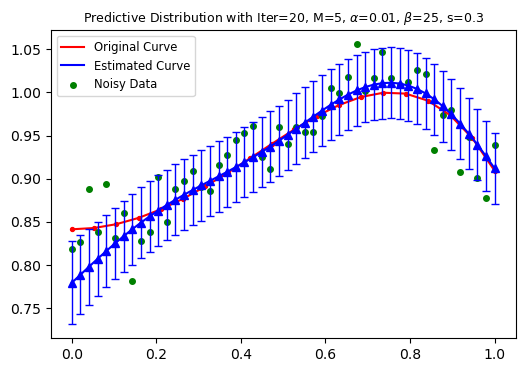

Iter: 21
Input Data: [15 46  8 49 19  5 25 22 34 48 35 17 40 23 23 38  3 32 37 14  7]


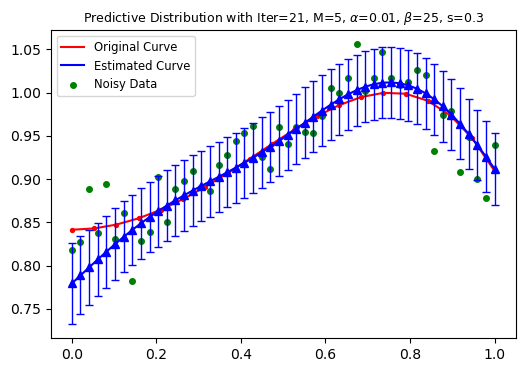

Iter: 22
Input Data: [15 46  8 49 19  5 25 22 34 48 35 17 40 23 23 38  3 32 37 14  7 42]


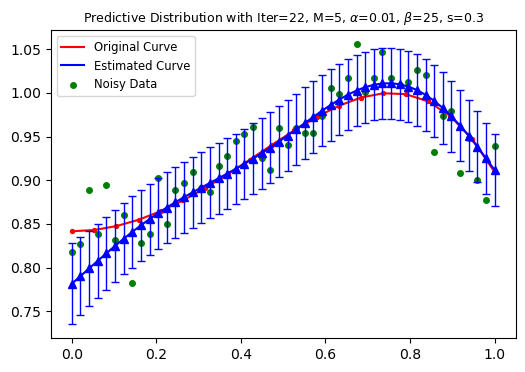

Iter: 23
Input Data: [15 46  8 49 19  5 25 22 34 48 35 17 40 23 23 38  3 32 37 14  7 42 31]


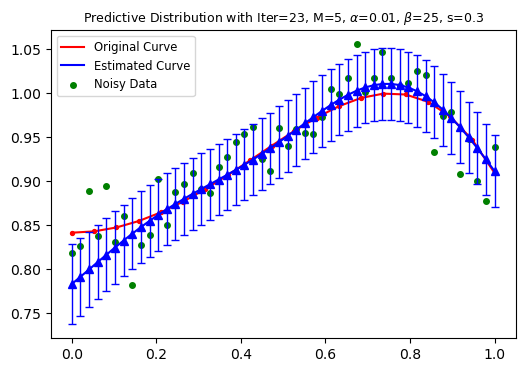

Iter: 24
Input Data: [15 46  8 49 19  5 25 22 34 48 35 17 40 23 23 38  3 32 37 14  7 42 31 38]


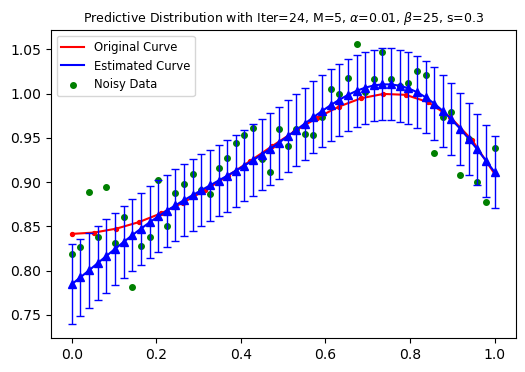

Iter: 25
Input Data: [15 46  8 49 19  5 25 22 34 48 35 17 40 23 23 38  3 32 37 14  7 42 31 38
 21]


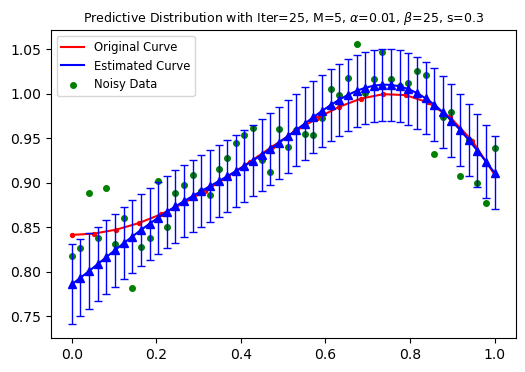

Iter: 26
Input Data: [15 46  8 49 19  5 25 22 34 48 35 17 40 23 23 38  3 32 37 14  7 42 31 38
 21 38]


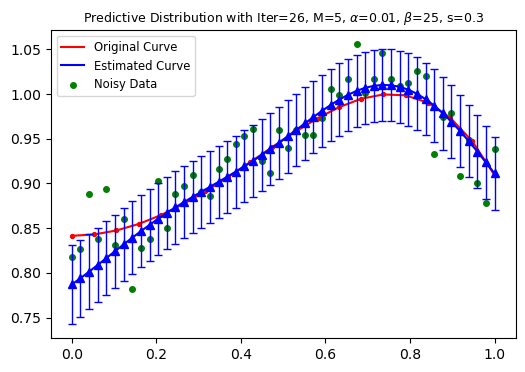

Iter: 27
Input Data: [15 46  8 49 19  5 25 22 34 48 35 17 40 23 23 38  3 32 37 14  7 42 31 38
 21 38 49]


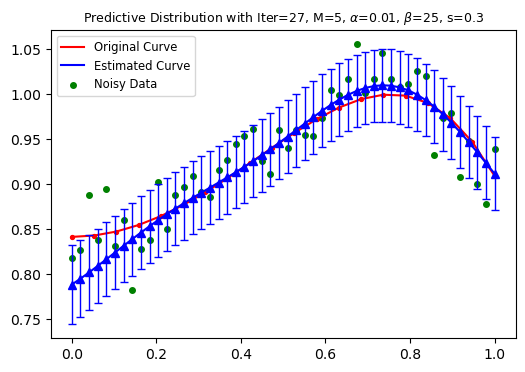

Iter: 28
Input Data: [15 46  8 49 19  5 25 22 34 48 35 17 40 23 23 38  3 32 37 14  7 42 31 38
 21 38 49 24]


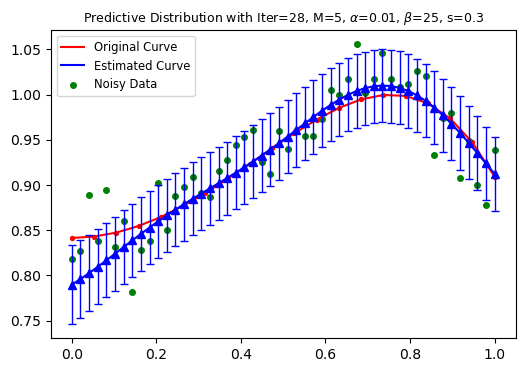

Iter: 29
Input Data: [15 46  8 49 19  5 25 22 34 48 35 17 40 23 23 38  3 32 37 14  7 42 31 38
 21 38 49 24 14]


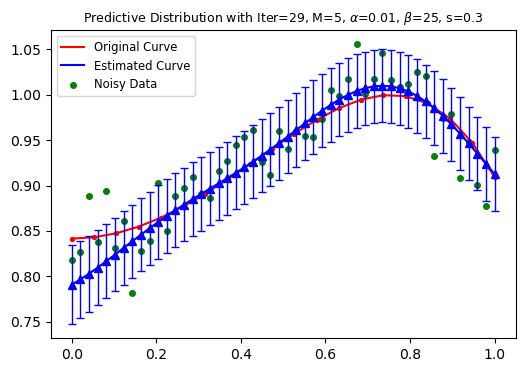

Iter: 30
Input Data: [15 46  8 49 19  5 25 22 34 48 35 17 40 23 23 38  3 32 37 14  7 42 31 38
 21 38 49 24 14 38]


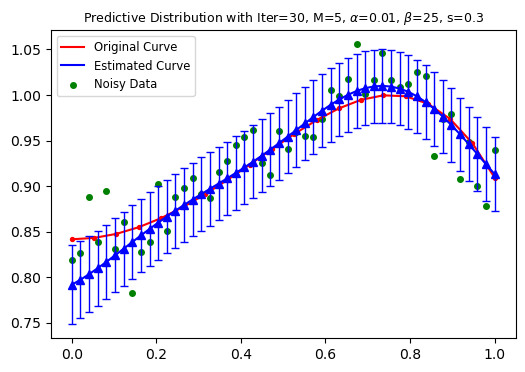

Iter: 31
Input Data: [15 46  8 49 19  5 25 22 34 48 35 17 40 23 23 38  3 32 37 14  7 42 31 38
 21 38 49 24 14 38 41]


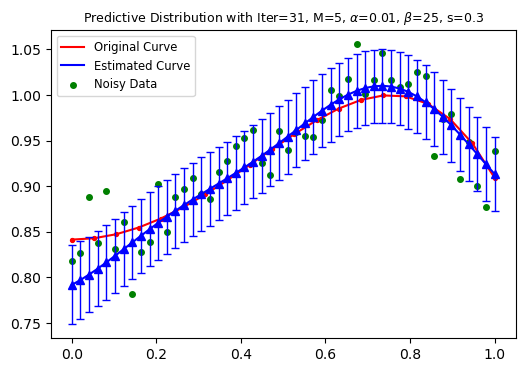

Iter: 32
Input Data: [15 46  8 49 19  5 25 22 34 48 35 17 40 23 23 38  3 32 37 14  7 42 31 38
 21 38 49 24 14 38 41 47]


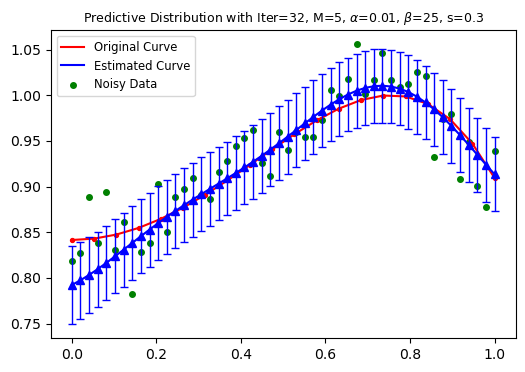

Iter: 33
Input Data: [15 46  8 49 19  5 25 22 34 48 35 17 40 23 23 38  3 32 37 14  7 42 31 38
 21 38 49 24 14 38 41 47 44]


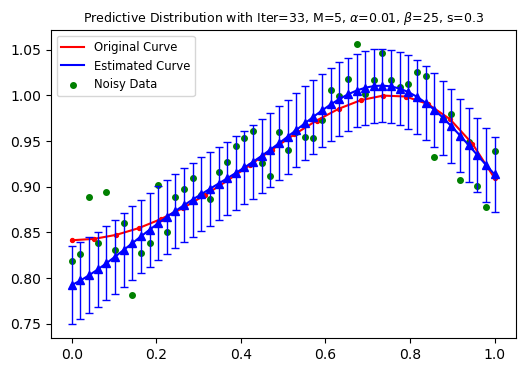

Iter: 34
Input Data: [15 46  8 49 19  5 25 22 34 48 35 17 40 23 23 38  3 32 37 14  7 42 31 38
 21 38 49 24 14 38 41 47 44 43]


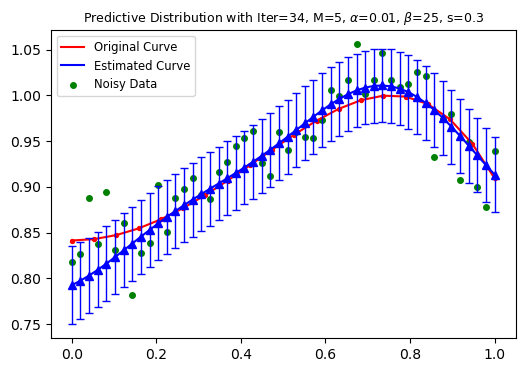

Iter: 35
Input Data: [15 46  8 49 19  5 25 22 34 48 35 17 40 23 23 38  3 32 37 14  7 42 31 38
 21 38 49 24 14 38 41 47 44 43  9]


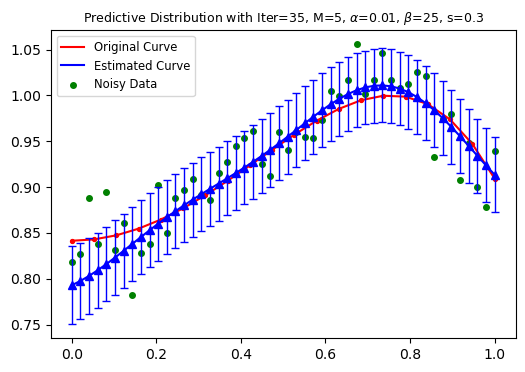

Iter: 36
Input Data: [15 46  8 49 19  5 25 22 34 48 35 17 40 23 23 38  3 32 37 14  7 42 31 38
 21 38 49 24 14 38 41 47 44 43  9 30]


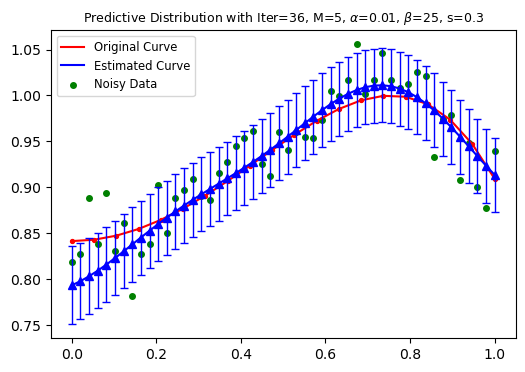

Iter: 37
Input Data: [15 46  8 49 19  5 25 22 34 48 35 17 40 23 23 38  3 32 37 14  7 42 31 38
 21 38 49 24 14 38 41 47 44 43  9 30 31]


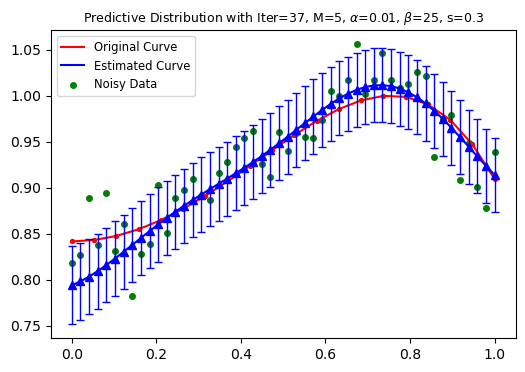

Iter: 38
Input Data: [15 46  8 49 19  5 25 22 34 48 35 17 40 23 23 38  3 32 37 14  7 42 31 38
 21 38 49 24 14 38 41 47 44 43  9 30 31  0]


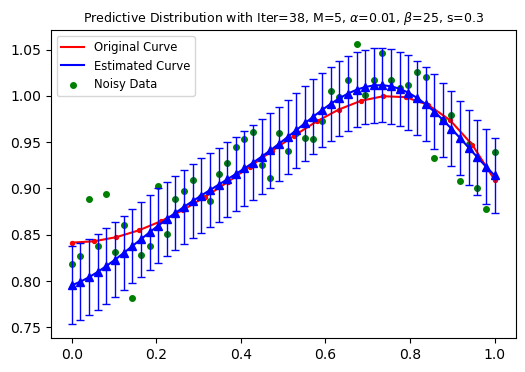

Iter: 39
Input Data: [15 46  8 49 19  5 25 22 34 48 35 17 40 23 23 38  3 32 37 14  7 42 31 38
 21 38 49 24 14 38 41 47 44 43  9 30 31  0  0]


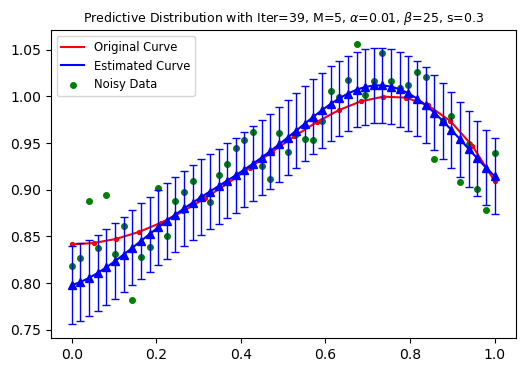

Iter: 40
Input Data: [15 46  8 49 19  5 25 22 34 48 35 17 40 23 23 38  3 32 37 14  7 42 31 38
 21 38 49 24 14 38 41 47 44 43  9 30 31  0  0 48]


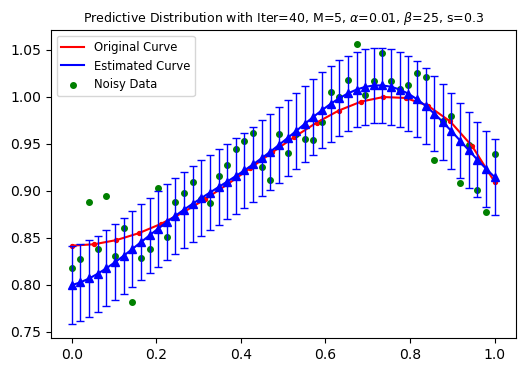

Iter: 41
Input Data: [15 46  8 49 19  5 25 22 34 48 35 17 40 23 23 38  3 32 37 14  7 42 31 38
 21 38 49 24 14 38 41 47 44 43  9 30 31  0  0 48 23]


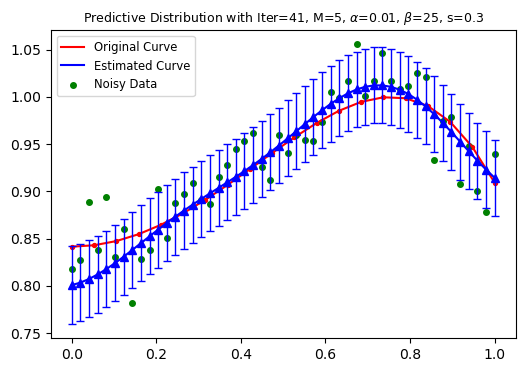

Iter: 42
Input Data: [15 46  8 49 19  5 25 22 34 48 35 17 40 23 23 38  3 32 37 14  7 42 31 38
 21 38 49 24 14 38 41 47 44 43  9 30 31  0  0 48 23 11]


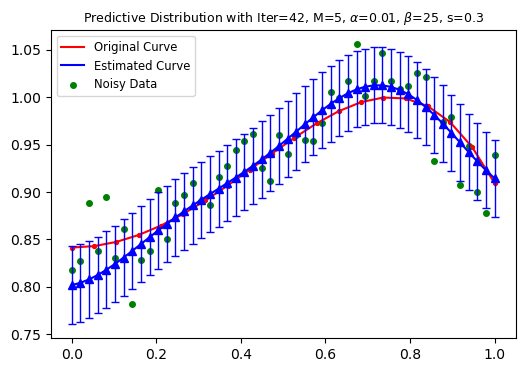

Iter: 43
Input Data: [15 46  8 49 19  5 25 22 34 48 35 17 40 23 23 38  3 32 37 14  7 42 31 38
 21 38 49 24 14 38 41 47 44 43  9 30 31  0  0 48 23 11 48]


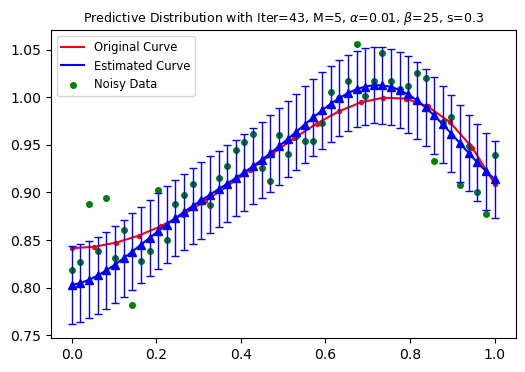

Iter: 44
Input Data: [15 46  8 49 19  5 25 22 34 48 35 17 40 23 23 38  3 32 37 14  7 42 31 38
 21 38 49 24 14 38 41 47 44 43  9 30 31  0  0 48 23 11 48 39]


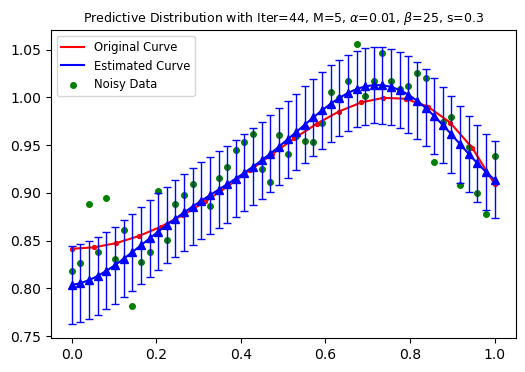

Iter: 45
Input Data: [15 46  8 49 19  5 25 22 34 48 35 17 40 23 23 38  3 32 37 14  7 42 31 38
 21 38 49 24 14 38 41 47 44 43  9 30 31  0  0 48 23 11 48 39 31]


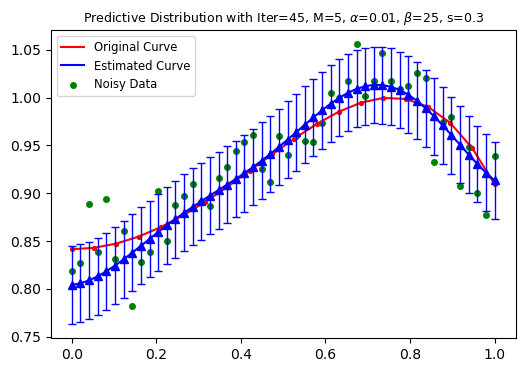

Iter: 46
Input Data: [15 46  8 49 19  5 25 22 34 48 35 17 40 23 23 38  3 32 37 14  7 42 31 38
 21 38 49 24 14 38 41 47 44 43  9 30 31  0  0 48 23 11 48 39 31 23]


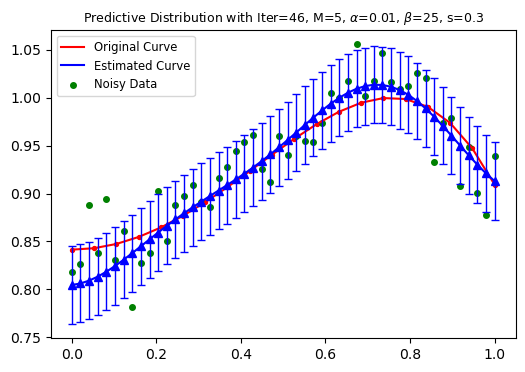

Iter: 47
Input Data: [15 46  8 49 19  5 25 22 34 48 35 17 40 23 23 38  3 32 37 14  7 42 31 38
 21 38 49 24 14 38 41 47 44 43  9 30 31  0  0 48 23 11 48 39 31 23  3]


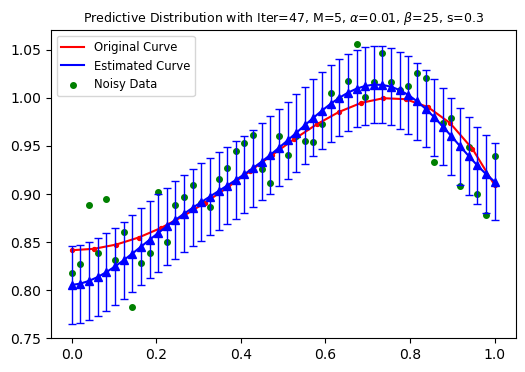

Iter: 48
Input Data: [15 46  8 49 19  5 25 22 34 48 35 17 40 23 23 38  3 32 37 14  7 42 31 38
 21 38 49 24 14 38 41 47 44 43  9 30 31  0  0 48 23 11 48 39 31 23  3 43]


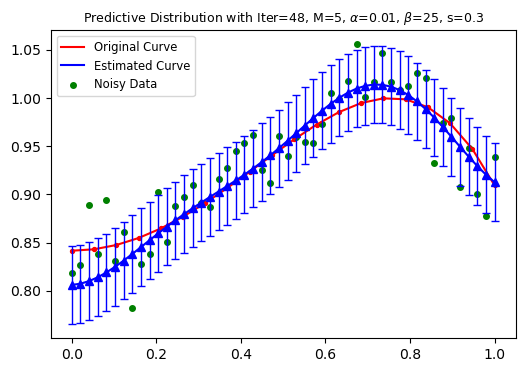

Iter: 49
Input Data: [15 46  8 49 19  5 25 22 34 48 35 17 40 23 23 38  3 32 37 14  7 42 31 38
 21 38 49 24 14 38 41 47 44 43  9 30 31  0  0 48 23 11 48 39 31 23  3 43
 39]


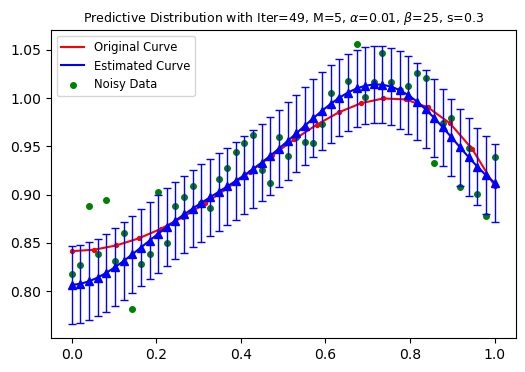

Iter: 50
Input Data: [15 46  8 49 19  5 25 22 34 48 35 17 40 23 23 38  3 32 37 14  7 42 31 38
 21 38 49 24 14 38 41 47 44 43  9 30 31  0  0 48 23 11 48 39 31 23  3 43
 39  7]


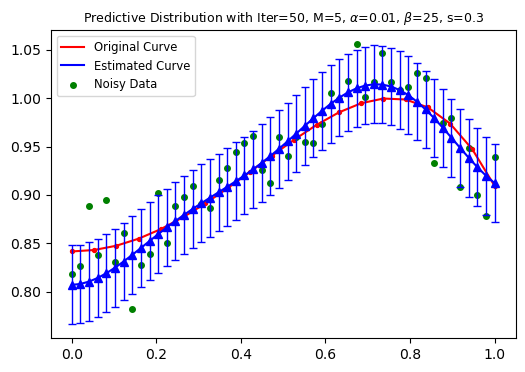

End Processing.


In [23]:
Pred_Distribution(5, 0.01, 25, x_noise, y_noise, 0.5)

8. Explain why the predictive distribution is better than the original form of the full Bayesian inference.

We are more interested in making predictions of $t^*$ for new given $x$ instead of values of $\bar{w}$ for the models. Predictive distribution can give as that prediction and its uncertainty.

9. Discuss the differences between $p(t_{new}|t)$ and $p(w|t)$.

The $p(\bar{w}|\bar{t})$ is posterior probability distribution of the parameter $\bar{w}$, $p(t_{new}|\bar{t})=\int p(t_{new}|\bar{w})p(\bar{w}|\bar{t}_n)d\bar{w}$, which is the marginalization over all possible values of w.